In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from google.colab import files
uploaded=files.upload()

Saving titanic.csv to titanic (3).csv


In [14]:
data=pd.read_csv('titanic.csv')

In [15]:
print(data)#glimpse of whole data

     Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0      m

In [16]:
data.head(6)#prints the dataset acc to our logic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583


In [17]:
data.tail(6) #to check from the last

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
881,0,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.125
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.450
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.000
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.750


In [18]:
data.info()   #extracting basic infromation
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [19]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [20]:
data.shape #no. of rows and col

(887, 8)

In [21]:
data.nunique()

,0
Survived,2
Pclass,3
Name,887
Sex,2
Age,89
Siblings/Spouses Aboard,7
Parents/Children Aboard,7
Fare,248


In [22]:
data['Pclass']

,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
882,2
883,1
884,3
885,1


In [23]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


In [24]:
data.duplicated().sum()

np.int64(0)

In [25]:
data.value_counts('Siblings/Spouses Aboard')

,count
Siblings/Spouses Aboard,
0,604
1,209
2,28
4,18
3,16
8,7
5,5


In [26]:
group=data[data['Survived']==1].groupby(['Sex','Pclass']).size().reset_index(name='survivorcount')
print(group)

      Sex  Pclass  survivorcount
0  female       1             91
1  female       2             70
2  female       3             72
3    male       1             45
4    male       2             17
5    male       3             47


In [27]:
group.sort_values(by='Pclass', ascending=True, inplace=True)
print(group) #printing data in the ascending order of Pclass for more understanding


      Sex  Pclass  survivorcount
0  female       1             91
3    male       1             45
1  female       2             70
4    male       2             17
2  female       3             72
5    male       3             47


<function matplotlib.pyplot.show(close=None, block=None)>

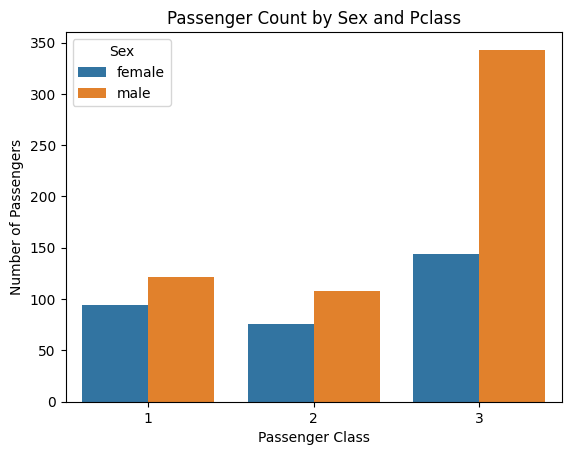

In [28]:
sns.countplot(x='Pclass', hue='Sex', data=data)
plt.title('Passenger Count by Sex and Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show

#shows the total number of people present in each pclass, split by sex

<function matplotlib.pyplot.show(close=None, block=None)>

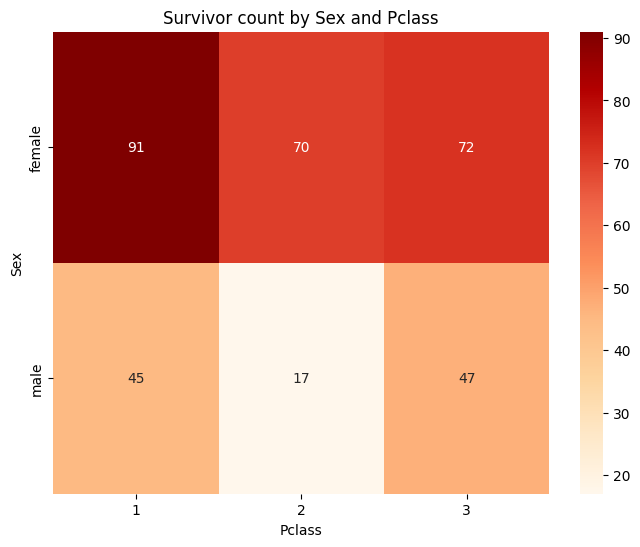

In [29]:
pivot=data[data['Survived']==1].pivot_table(index='Sex',columns='Pclass',values='Survived',aggfunc='count')
plt.figure(figsize=(8,6))
sns.heatmap(pivot,annot=True,cmap='OrRd')
plt.title('Survivor count by Sex and Pclass')
plt.show

In [34]:
#The heatmap tells us quickly see that more females survived,especially in higher classes,while men had fewer survivors overall

<function matplotlib.pyplot.show(close=None, block=None)>

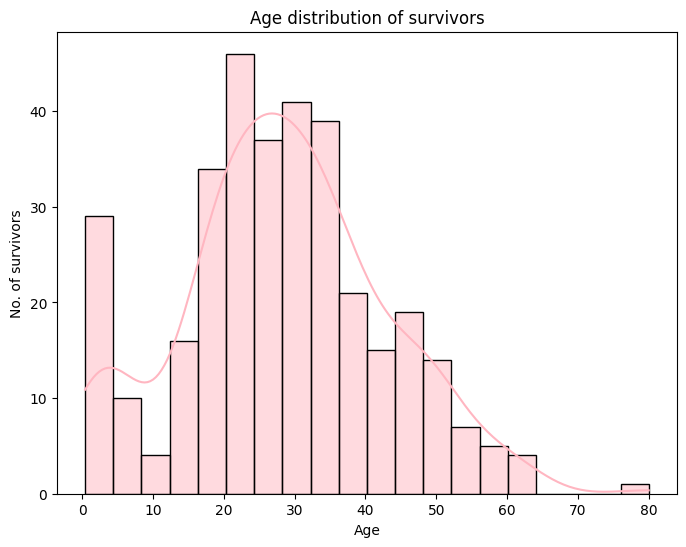

In [32]:
survivors=data[data['Survived']==1]
plt.figure(figsize=(8,6))
sns.histplot(survivors['Age'],bins=20,kde=True,color='lightpink')
plt.title('Age distribution of survivors')
plt.xlabel('Age')
plt.ylabel('No. of survivors')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

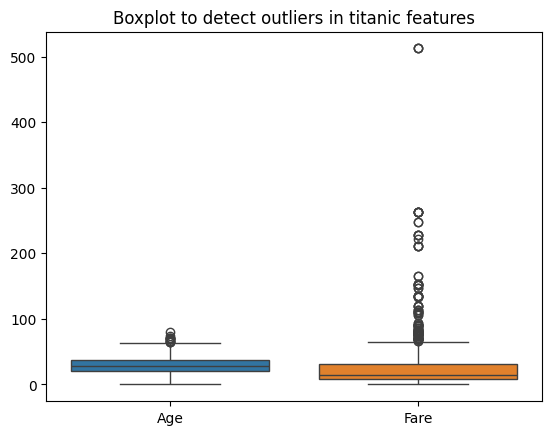

In [35]:
sns.boxplot(data=data[['Age','Fare']])
plt.title('Boxplot to detect outliers in titanic features')
plt.show

In [36]:
#calculating IQR
Q1=data['Age'].quantile(0.25)
Q3=data['Age'].quantile(0.75)
IQRage=Q3-Q1
lowerlimit=Q1-1.5*IQRage
upperlimit=Q3+1.5*IQRage

q1=data['Fare'].quantile(0.25)
q3=data['Fare'].quantile(0.75)
iqrfare=q3-q1
lowerlimit=q1-1.5*iqrfare
upperlimit=q3+1.5*iqrfare


#REMOVING ouliers
upper=np.where(data['Age']>=(Q3+1.5*IQRage))
lower=np.where(data['Age']<=(Q1-1.5*IQRage))
data.drop(upper[0], inplace=True)
data.drop(lower[0],inplace=True)

In [37]:
#model training
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
x=data.drop(labels=['Survived','Name','Sex'], axis=1)
y=data['Survived']
x.columns

Index(['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard',
       'Fare'],
      dtype='object')

In [39]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)
x_train

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
553,1,48.0,1,0,39.6000
403,2,34.0,1,0,21.0000
778,1,29.0,0,0,30.0000
317,1,40.0,1,1,134.5000
331,3,16.0,2,0,18.0000
...,...,...,...,...,...
109,1,47.0,0,0,52.0000
274,3,45.0,0,0,7.7500
873,3,19.0,0,0,7.8958
440,2,28.0,0,0,13.0000


In [40]:
from sklearn.neighbors import KNeighborsClassifier


In [41]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7085714285714285
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       106
           1       0.67      0.51      0.58        69

    accuracy                           0.71       175
   macro avg       0.70      0.67      0.68       175
weighted avg       0.70      0.71      0.70       175



In [42]:
model1= KNeighborsClassifier(n_neighbors=5)
model1.fit(x_train, y_train)
y_pred=model1.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.6685714285714286
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       106
           1       0.60      0.46      0.52        69

    accuracy                           0.67       175
   macro avg       0.65      0.63      0.64       175
weighted avg       0.66      0.67      0.66       175



<function matplotlib.pyplot.show(close=None, block=None)>

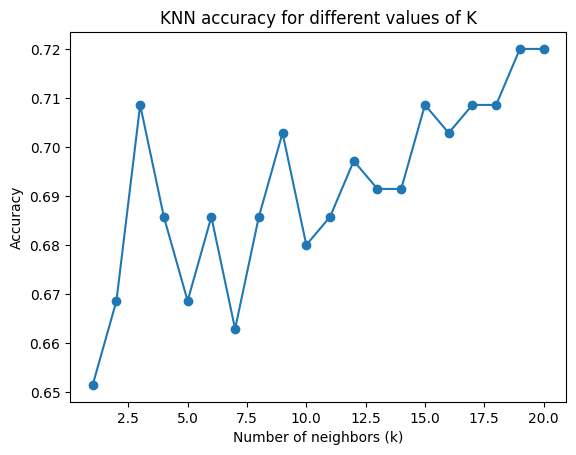

In [46]:
accuracy_scores= []
for k in range(1,21):
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  pred=model.predict(x_test)
  acc=accuracy_score(y_test, pred)
  accuracy_scores.append(acc)


#plot accuracy vs K

plt.plot(range(1,21),accuracy_scores, marker='o')
plt.title('KNN accuracy for different values of K')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.show